In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime,date

In [3]:
#1.List female White patients who are No Shows for Surgery during the month of April 2019.
import pandas as pd
from datetime import datetime,date

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
provider= pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
amb= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Merging three tables Providers, Ambulatory Visits, Patients
df_merge = patient[["PatientID","Gender","Race"]].merge(edvisit[["EDVisitID","PatientID"]],
                                                   on = "PatientID",
                                                   how = "inner").merge(amb[["ProviderID","PatientMRN","DateofVisit","VisitStatus"]],
                                                   left_on = "PatientID",right_on = "PatientMRN",
                                                   how = "inner").merge(provider[["ProviderID","ProviderSpecialty"]],
                                                                       on = "ProviderID",
                                                                       how = "inner")

#Retreiving only the rows satisfying the filter conditions
df_pat = df_merge.loc[(df_merge["Gender"] == 'Female') & (df_merge["Race"] == 'White') & (df_merge["ProviderSpecialty"] == 'Surgery') &  
             (df_merge["VisitStatus"] == 'No Show') &  (df_merge["DateofVisit"] > '2019-3-1') & 
             (df_merge["DateofVisit"] < '2019-3-30')]
df_pat

,PatientID,Gender,Race,EDVisitID,ProviderID,PatientMRN,DateofVisit,VisitStatus,ProviderSpecialty
340,34,Female,White,34,10,34,2019-03-18,No Show,Surgery
341,34,Female,White,125,10,34,2019-03-18,No Show,Surgery
366,818,Female,White,1072,10,818,2019-03-17,No Show,Surgery
367,831,Female,White,1085,10,831,2019-03-10,No Show,Surgery
374,872,Female,White,1126,10,872,2019-03-29,No Show,Surgery
381,35,Female,White,35,11,35,2019-03-19,No Show,Surgery
382,35,Female,White,126,11,35,2019-03-19,No Show,Surgery
399,819,Female,White,1073,11,819,2019-03-18,No Show,Surgery
400,832,Female,White,1086,11,832,2019-03-11,No Show,Surgery
413,36,Female,White,127,12,36,2019-03-20,No Show,Surgery


In [4]:
#2.From question 34,Extract individual 1D slices from main array and then combine them to form a 2D array 
#using numpy.ix_() function
a= np.arange(1,31).reshape((6, 5))
print(a)
y= a[np.ix_([0,2],[1,3])]
print(y)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
[[ 2  4]
 [12 14]]


In [5]:
#3.From question 34,Find the array slicing to get the elements with values 3,8,13,18,23,28
#using Ellipsis
a = np.arange(1,31).reshape((6, 5))
print(a)
print(a[Ellipsis,2])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
[ 3  8 13 18 23 28]


In [6]:
#4.From question 34 Array:Removing the start, end elements of the given multidimensional array
a = np.arange(1,31).reshape((6, 5))
print(a)
print(a[:, 1:-1])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
[[ 2  3  4]
 [ 7  8  9]
 [12 13 14]
 [17 18 19]
 [22 23 24]
 [27 28 29]]


In [7]:
#5.From question 34,with condition element value less than 6 ,print as -1 else as 99
#np where()
a = np.arange(1,31).reshape((6, 5))
print(a)
print(np.where(a < 6, -1, 99))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
[[-1 -1 -1 -1 -1]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]]


In [8]:
#6.Retrieve the rows of data based on descending order of BloodPressureSystolic.
df= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
dbp = df.sort_values(['BloodPressureSystolic'], ascending=[0])
dbp

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
805,666,818,33,2019-02-09,2019-02-01 02:22:14.761,10,Physical,NaN,NaN,NaN,Completed
807,555,72,35,2019-04-30,2019-04-02 08:38:32.357,7,Follow Up,NaN,NaN,NaN,Completed
808,645,90,37,2019-03-16,2019-02-16 17:45:16.908,1,Telemedicine,NaN,NaN,NaN,Completed
810,773,858,24,2019-03-12,2019-02-25 02:59:43.233,2,Follow Up,NaN,NaN,NaN,Completed


Text(0.5, 1.0, 'Correlation Matrix with ED Disposition is set to Discharged')

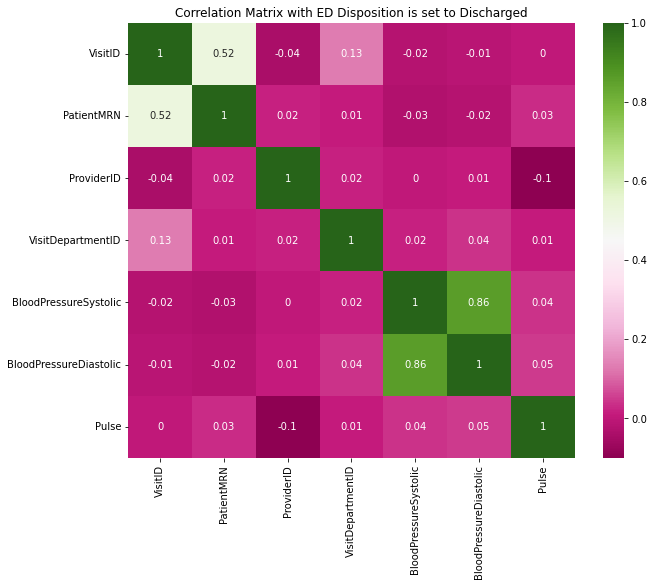

In [9]:
#7.Create a correlation map on Ambulatory Visits Table.
df_amb = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")

#Correlation Matrix between the columns
corr = df_amb.corr()
corr

#Plotting the map
plt.figure(figsize=(10,8))
plot=sns.heatmap(df_amb.corr().round(2),annot = True,cmap = "PiYG")

plt.title("Correlation Matrix with ED Disposition is set to Discharged")

In [10]:
#8.Delete the column 'Acuity' using pop function
EDVisit= pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")
block = pd.DataFrame(EDVisit)
block.pop('Acuity')
print("\nData frame after deleting the column 'Acuity':\n")
block.head()


Data frame after deleting the column 'Acuity':



,EDVisitID,PatientID,VisitDate,EDDischargeTime,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,Chest Pain,Admitted


In [11]:
#9.Display the data for all 'Black/African-American English Female' patients
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")

Patients_df = df[(df.Race == 'Black/African-American') & (df.Gender == 'Female') & (df.Language == 'English')]
Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
120,121,Granny,Prandoni,1984-12-26 04:09:28.604,Female,Black/African-American,English
121,122,Hilll,Nock,1966-03-28 19:01:51.451,Female,Black/African-American,English
122,123,Pollyanna,Mochan,1973-05-06 06:39:21.883,Female,Black/African-American,English
123,124,Lucila,McGrann,1972-03-06 15:34:40.549,Female,Black/African-American,English
124,125,Mia,Inc,1971-03-21 15:38:42.818,Female,Black/African-American,English
...,...,...,...,...,...,...,...
914,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Female,Black/African-American,English
915,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English
916,917,Velvet,Bushnell,1965-11-13 07:26:58.889,Female,Black/African-American,English
917,918,Kiri,Allom,1960-09-05 13:21:10.008,Female,Black/African-American,English


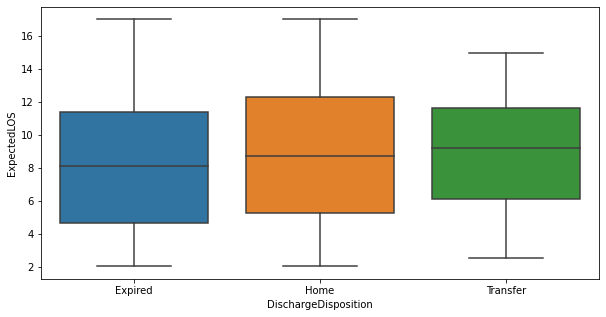

In [12]:
#10.Create a boxplot on ExpectedLOS with respect to discharge disposition
dischargesdf=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")

fig = plt.figure(figsize = (10, 5))
# To create a boxplot
sns.boxplot(x=dischargesdf.DischargeDisposition,y=dischargesdf.ExpectedLOS)
 
plt.show()

In [13]:
#11.Retrieve count of patient who are prone to Hypertension crisis (SBP>180 & DBP >120)
df= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
Count = print(((df["BloodPressureSystolic"] >= 180) & (df["BloodPressureDiastolic"] >= 120)).sum())


110


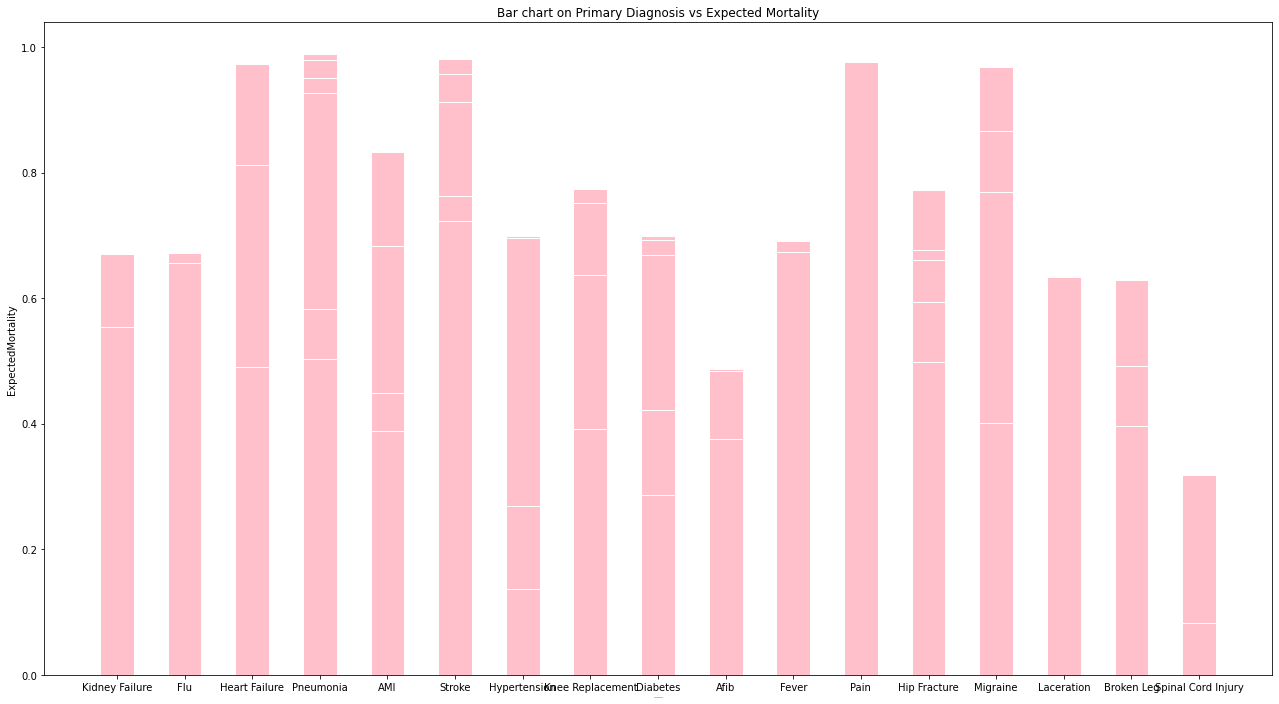

In [13]:
#12 Create a bar chart showing Primary Diagnosis with high expected mortality .
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "ReAdmissionRegistry")
#To fix the plot size

fig = plt.figure(figsize = (22,12))

#To declare Variable
x = df.PrimaryDiagnosis
y = df.ExpectedMortality

# creat a bar chart
plt.bar(x,y,color='Pink', width=0.5,edgecolor='white')

# To Put label for axis
plt.xlabel("Primary Diagnosis",fontsize=1)
plt.ylabel("ExpectedMortality")
plt.title("Bar chart on Primary Diagnosis vs Expected Mortality", color="black")
# To show chart
plt.show()

In [15]:
#13.Find the correlation between "Blood Pressure systolic" and "Blood Pressure Diastolic"
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
df[["BloodPressureSystolic","BloodPressureDiastolic"]].corr()

,BloodPressureSystolic,BloodPressureDiastolic
BloodPressureSystolic,1.00000,0.86488
BloodPressureDiastolic,0.86488,1.00000


In [14]:
!pip install folium
import folium


In [15]:
#14.Generate India Map using Folium
India_map = folium.Map(location=[21.7679,  78.8718], zoom_start=5,tiles='Stamen Terrain')

# display world map
India_map

In [20]:
#15.Find the maximum expired patients based on Primary Diagnosis
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
df_DD = df.loc[df.DischargeDisposition == "Expired"]
Max_PD = df_DD['PrimaryDiagnosis'].max()
print('The maximum expired patients - ',Max_PD)

The maximum expired patients -  Stroke


In [21]:
#16.Connect to sql and  Write a query to get Ambulatory visit record's year

import psycopg2

conn = psycopg2.connect(
   database="HospitalDB_New", user='postgres', password='Andavagx&1', host='::1', port= 5432
)
cursor = conn.cursor()
sql_command = '''Select distinct extract (year from "DateofVisit" ) AS "Year" from public."AmbulatoryVisits"
'''

cursor.execute(sql_command)
print(cursor.fetchall())
conn.commit()
cursor.close()
conn.close()

[(Decimal('2019'),)]


In [22]:
#17.Get Patients name who have discharged
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
edunique = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDUnique")

df_merge = patient[["PatientID","FirstName","LastName"]].merge(edunique[["PatientID","EDDisposition"]],
                                                   on = "PatientID",
                                                   how = "inner")
df_pat = df_merge.loc[(df_merge["EDDisposition"] == "Discharged")]
df_pat

                                            

,PatientID,FirstName,LastName,EDDisposition
1,2,Far,Myers,Discharged
4,5,Tann,Bama,Discharged
5,6,Jerrilyn,Kane,Discharged
6,7,Skipton,Bar,Discharged
19,20,Megan,Walter,Discharged
...,...,...,...,...
883,884,Knox,Dyson,Discharged
884,885,Kellsie,Inc,Discharged
887,888,Rosemonde,Eschalotte,Discharged
892,893,Gail,McGrath,Discharged


C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ExpectedMortality', ylabel='Density'>

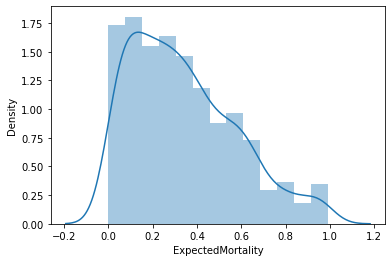

In [23]:
#18.Plot the distribution curve for LOS
import seaborn as sns 
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
#df["Los"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days
sns.distplot(df["ExpectedMortality"], kde = True)

In [24]:
#19.Find the interquartile for Blood Pressure Diastolic
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
Q1,Q3=df['BloodPressureDiastolic'].quantile(.25),df['BloodPressureDiastolic'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile of Blood Pressure Diastolic:', IQR)

The Inter Quartile of Blood Pressure Diastolic: 35.673929215


In [25]:
#20.Find out upper bound and lower bound for Blood pressure diastolic and Find out if outliers exist in Blood Pressure Diastolic
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)
outliers=(df['BloodPressureDiastolic']<lower) | (df['BloodPressureDiastolic']>upper)
No_outliers = outliers.sum()
print("No of outliers is:",No_outliers)

Upper Bound: 177.2510082975
Lower Bound: 34.555291437499996
No of outliers is: 0


In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


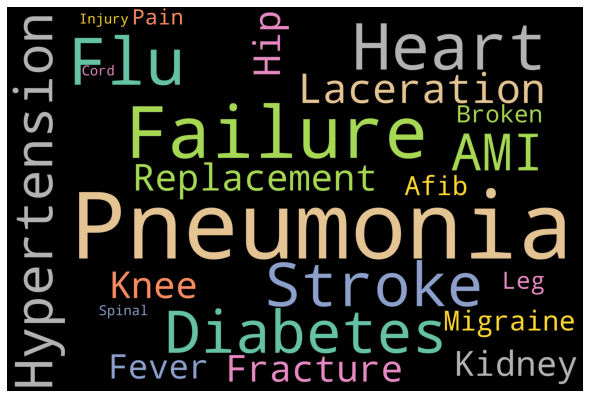

In [27]:
#21.Create word cloud for Primary diagnosis
from wordcloud import WordCloud, STOPWORDS
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
stopwords = set(STOPWORDS)

text = " ".join(cat for cat in df.PrimaryDiagnosis)
 
wordcloud = WordCloud( width=3000,
        height=2000,
        random_state=123,
        background_color="Black",
        colormap="Set2",
        collocations=False,
        stopwords=STOPWORDS,).generate(text)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

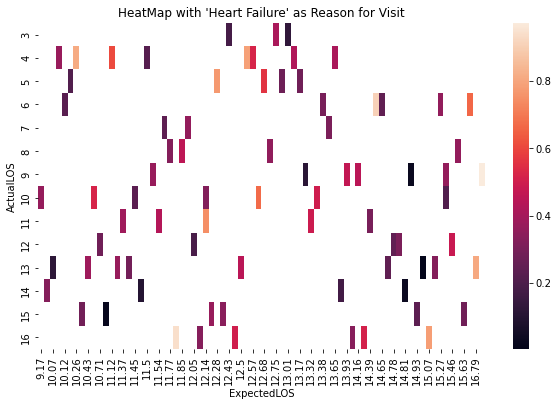

In [28]:
#22.Create a heat map to show the correlation between the column values of ReAdmissionRegistry.


df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#Calculating the actual Length of Stay in hospital by finding the difference between Discharge and Admission date.

df["ActualLOS"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days
df["ExpectedLOS"] = df["ExpectedLOS"].round(2)

#Choosing the Reason for Visit as Heart Failure
df_filt =df.loc[df.PrimaryDiagnosis == 'Heart Failure']

#plotting the heatmap
df_filt = df_filt.pivot("ActualLOS","ExpectedLOS","ExpectedMortality")
plt.figure(figsize=(10,6))
plot=sns.heatmap(df_filt)
plt.title("HeatMap with 'Heart Failure' as Reason for Visit")
plt.show()

In [29]:
#23.Which 'Service' has most difference in Expected LOS?
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["Service","ExpectedLOS"]]
df_diff= df_readm.groupby("Service")["ExpectedLOS"].apply(lambda x: x.max() - x.min()).nlargest(1).reset_index(name='Difference in LOS')
display(df_diff)     

,Service,Difference in LOS
0,ICU,14.985239


In [30]:
#24.List the Primary Diagnosis with their corresponding difference in Expected Mortality.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["PrimaryDiagnosis","ExpectedMortality"]]
df_diff= df_readm.groupby("PrimaryDiagnosis")["ExpectedMortality"].apply(lambda x: x.max() - x.min()).reset_index(name='Exp Mortality rate difference')
display(df_diff)     

,PrimaryDiagnosis,Exp Mortality rate difference
0,AMI,0.828212
1,Afib,0.405381
2,Broken Leg,0.602421
3,Diabetes,0.698903
4,Fever,0.654424
5,Flu,0.641812
6,Heart Failure,0.969791
7,Hip Fracture,0.760645
8,Hypertension,0.693323
9,Kidney Failure,0.660022


In [31]:
#25.List female patients over the age of 50 who have had their surgery cancelled in the month of February 2019.
import pandas as pd
from datetime import datetime,date

#Retrieving the age fron DOB
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))

patient['Age'] = df_dob.apply(age)

provider= pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
amb= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Merging three tables Providers, Ambulatory Visits, Patients
df_merge = patient[["PatientID","Age","Gender"]].merge(edvisit[["EDVisitID","PatientID"]],
                                                   on = "PatientID",
                                                   how = "inner").merge(amb[["ProviderID","PatientMRN","DateofVisit","VisitStatus"]],
                                                   left_on = "PatientID",right_on = "PatientMRN",
                                                   how = "inner").merge(provider[["ProviderID","ProviderSpecialty"]],
                                                                       on = "ProviderID",
                                                                       how = "inner")

#Retreiving only the rows satisfying the filter conditions
df_pat = df_merge.loc[(df_merge["Age"] >50) & (df_merge["Gender"] == 'Female') & (df_merge["ProviderSpecialty"] == 'Surgery') &  
             (df_merge["VisitStatus"] == 'Canceled') &  (df_merge["DateofVisit"] > '2019-2-1') & 
             (df_merge["DateofVisit"] < '2019-2-28')]
df_pat

,PatientID,Age,Gender,EDVisitID,ProviderID,PatientMRN,DateofVisit,VisitStatus,ProviderSpecialty
434,641,62,Female,895,12,641,2019-02-11,Canceled,Surgery


In [32]:
#26.Count of patients based on Discharge Disposition & Service

readm= pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readm[["DischargeDisposition","Service","PatientID"]]
patientcount = df_readm.groupby(["DischargeDisposition","Service"]).count()
display(patientcount)

PatientID
DischargeDisposition Service                    
Expired              Cardiology               15
                     General Medicine         18
                     Hospitalist              10
                     ICU                      29
                     Neurology                27
                     Orthopeadics              5
Home                 Cardiology               75
                     General Medicine        229
                     Hospitalist              88
                     ICU                     110
                     Neurology                36
                     Orthopeadics             39
Transfer             Cardiology                5
                     General Medicine         16
                     Hospitalist               3
                     ICU                      12
                     Neurology                 2
                     Orthopeadics              1

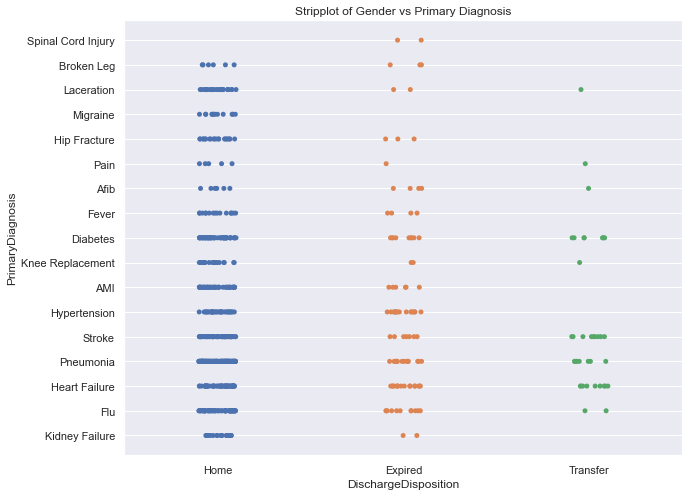

In [33]:
#27.Plot a stripplot showing the distribution of Primary Diagnosis vs Discharge Disposition.
# use to set style of background of plot
sns.set(style="darkgrid")
  
# loading data-set
readm= pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readm[["PrimaryDiagnosis","DischargeDisposition"]]  

plt.figure(figsize=(10,8))
ax = sns.stripplot(x='DischargeDisposition', y='PrimaryDiagnosis', data=df_readm,jitter = True,dodge = True)
  
# giving title to the plot
plt.title('Stripplot of Gender vs Primary Diagnosis')
  
# function to show plot
plt.show()

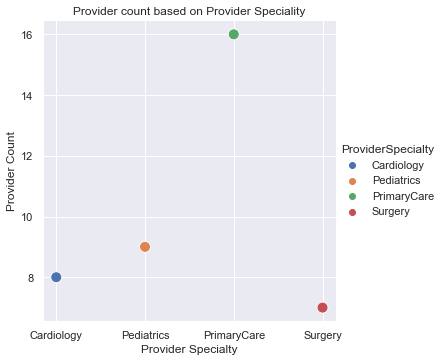

In [34]:
#28.Create a plot of Provider count based on Provider Speciality.
provider = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
df_prod = provider[["ProviderSpecialty","ProviderID"]]
prod=df_prod.groupby("ProviderSpecialty").count()


p=sns.relplot(x ="ProviderSpecialty", y ="ProviderID",
            hue ="ProviderSpecialty", data = prod,s=120);
p.set(xlabel ="Provider Specialty", ylabel = "Provider Count", title ='Provider count based on Provider Speciality')

In [35]:
#29.Calculate the mean Expected LOS based on PrimaryDiagnosis.
readm= pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readm[["PrimaryDiagnosis","ExpectedLOS"]]
mean_value = df_readm.groupby(["PrimaryDiagnosis"])["ExpectedLOS"].mean().round().reset_index(name='Mean Expected LOS')
mean_value

,PrimaryDiagnosis,Mean Expected LOS
0,AMI,12.0
1,Afib,13.0
2,Broken Leg,5.0
3,Diabetes,7.0
4,Fever,7.0
5,Flu,6.0
6,Heart Failure,13.0
7,Hip Fracture,3.0
8,Hypertension,6.0
9,Kidney Failure,7.0


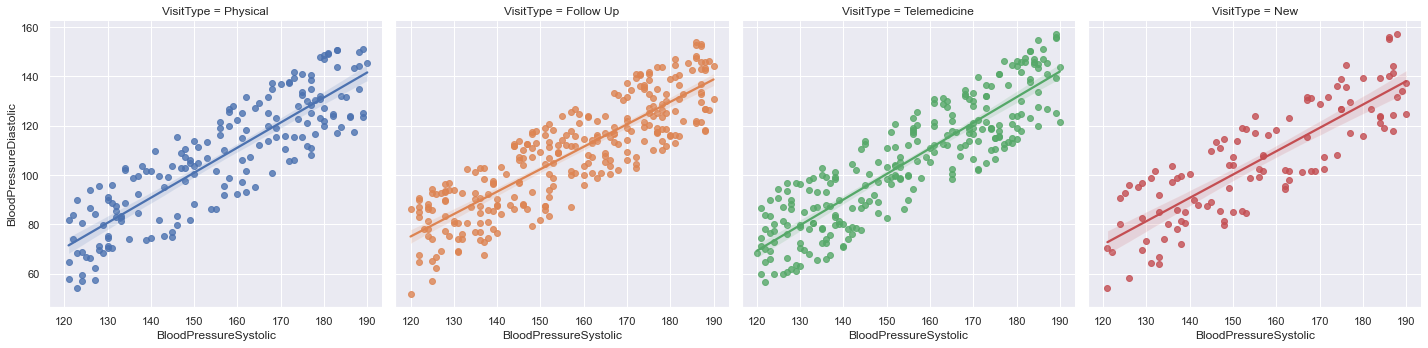

In [8]:
#30. Use Seaborn lmplot to show the realtion between BPS and BPD.
import seaborn as sns; sns.set_theme(color_codes=True)
df_amb=pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")

g = sns.lmplot(x="BloodPressureSystolic", y="BloodPressureDiastolic",hue ="VisitType", col="VisitType",
               data=df_amb)

In [9]:
#31. . Display the datatypes of the columns in the table "Ambulatory Visit".
df =pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
df.dtypes

VisitID                            int64
PatientMRN                         int64
ProviderID                         int64
DateofVisit               datetime64[ns]
DateScheduled             datetime64[ns]
VisitDepartmentID                  int64
VisitType                         object
BloodPressureSystolic            float64
BloodPressureDiastolic           float64
Pulse                            float64
VisitStatus                       object
dtype: object

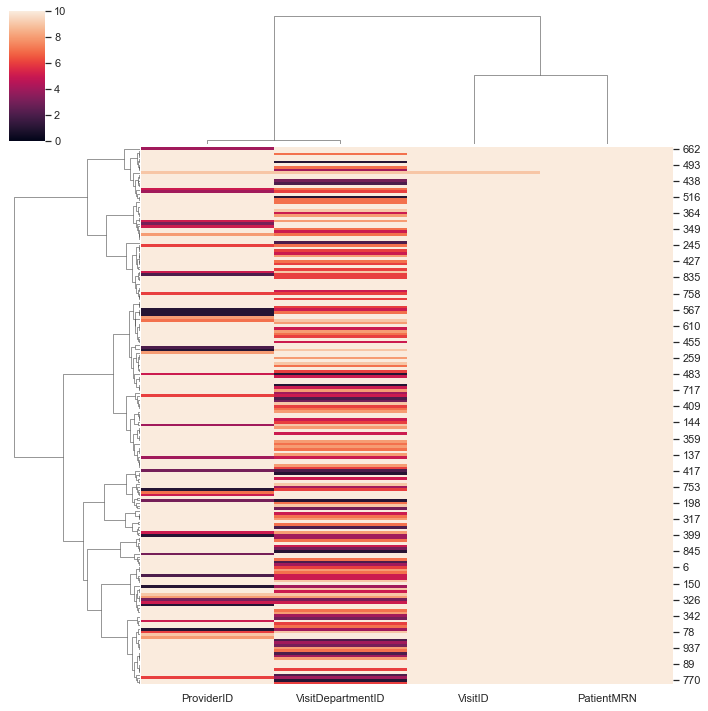

In [30]:
#32.Create a Clustermap with only the columns with datatype 'integer' from AmbulatoryVisits. 
import seaborn as sns; sns.set_theme(color_codes=True)

df_amb =pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")

#selecting few rows
df=df_amb.sample(n=200)

#selecting only the columns with integer datatype
df_amb=df.select_dtypes(include='int64')
# plotting clustermap
g = sns.clustermap(df_amb,vmin=0, vmax=10)

In [31]:
#33.List the occurances of patients with their Primary Diagnosis, along with Discharge disposition.

df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#using crosstab function, listing the combinations of the two columns listed
df_readm = pd.crosstab(df["PrimaryDiagnosis"], df["DischargeDisposition"])
                       
df_readm    

DischargeDisposition,Expired,Home,Transfer
PrimaryDiagnosis,,,
AMI,6,42,0
Afib,4,6,1
Broken Leg,3,6,0
Diabetes,9,48,7
Fever,4,15,0
Flu,11,67,2
Heart Failure,16,53,9
Hip Fracture,3,20,0
Hypertension,16,34,0


In [32]:
#34. List the statistics for Expected LOS.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#Using describe function to display the statistics for Expected LOS
df["ExpectedLOS"].describe()

count    720.000000
mean       8.824589
std        4.034421
min        2.012974
25%        5.138501
50%        8.633825
75%       12.107623
max       16.998213
Name: ExpectedLOS, dtype: float64

In [33]:
#35. Give the cumulative sum of Expected LOS & Expected Mortality.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#using cumsum() function to display the cumulative sum of all the values of the previous rows.
df["ExpectedLOS"].cumsum()


0         6.717771
1        10.543740
2        13.926234
3        17.689586
4        31.340539
          ...     
715    6327.210351
716    6338.565807
717    6343.385689
718    6346.508753
719    6353.704195
Name: ExpectedLOS, Length: 720, dtype: float64

In [36]:
#36. List male patients over the age of 50 had Chest Pain.
from datetime import datetime,date

#Retrieving the age fron DOB
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))

patient['Age'] = df_dob.apply(age)

provider= pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
amb= pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDVisits")

#Merging three tables Providers, Ambulatory Visits, Patients
df_merge = patient[["PatientID","Gender","Age"]].merge(edvisit[["PatientID","ReasonForVisit"]],
                                                   on = "PatientID",
                                                   how = "inner")

#Retreiving only the rows satisfying the filter conditions
df_pat = df_merge.loc[(df_merge["Gender"] == 'Male') & (df_merge["ReasonForVisit"] == 'Chest Pain') &  
             (df_merge["Age"] > 50) ]
df_pat

,PatientID,Gender,Age,ReasonForVisit
33,15,Male,60,Chest Pain
41,19,Male,62,Chest Pain
345,194,Male,53,Chest Pain
385,232,Male,60,Chest Pain
386,233,Male,58,Chest Pain
420,250,Male,58,Chest Pain
424,252,Male,54,Chest Pain
444,262,Male,55,Chest Pain
448,264,Male,58,Chest Pain
452,266,Male,56,Chest Pain


In [41]:
#37. How many patients got transferred from ICU?
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
dfpat = df[["Service","DischargeDisposition"]]
df_pat = print(((dfpat["Service"] == 'ICU') & (dfpat["DischargeDisposition"] == 'Transfer')).sum())

12


In [52]:
#38. What is the average age of Male and Female patients in the given dataset?
from datetime import datetime,date

#Retrieving the age fron DOB
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))

patient['Age'] = df_dob.apply(age)

patient[["Gender","Age"]].groupby("Gender").mean().round(decimals=2)

,Age
Gender,
Female,48.60
Male,48.76


In [55]:
#39. Count of patients admitted in each Service.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df["Service"].value_counts()

General Medicine    263
ICU                 151
Hospitalist         101
Cardiology           95
Neurology            65
Orthopeadics         45
Name: Service, dtype: int64

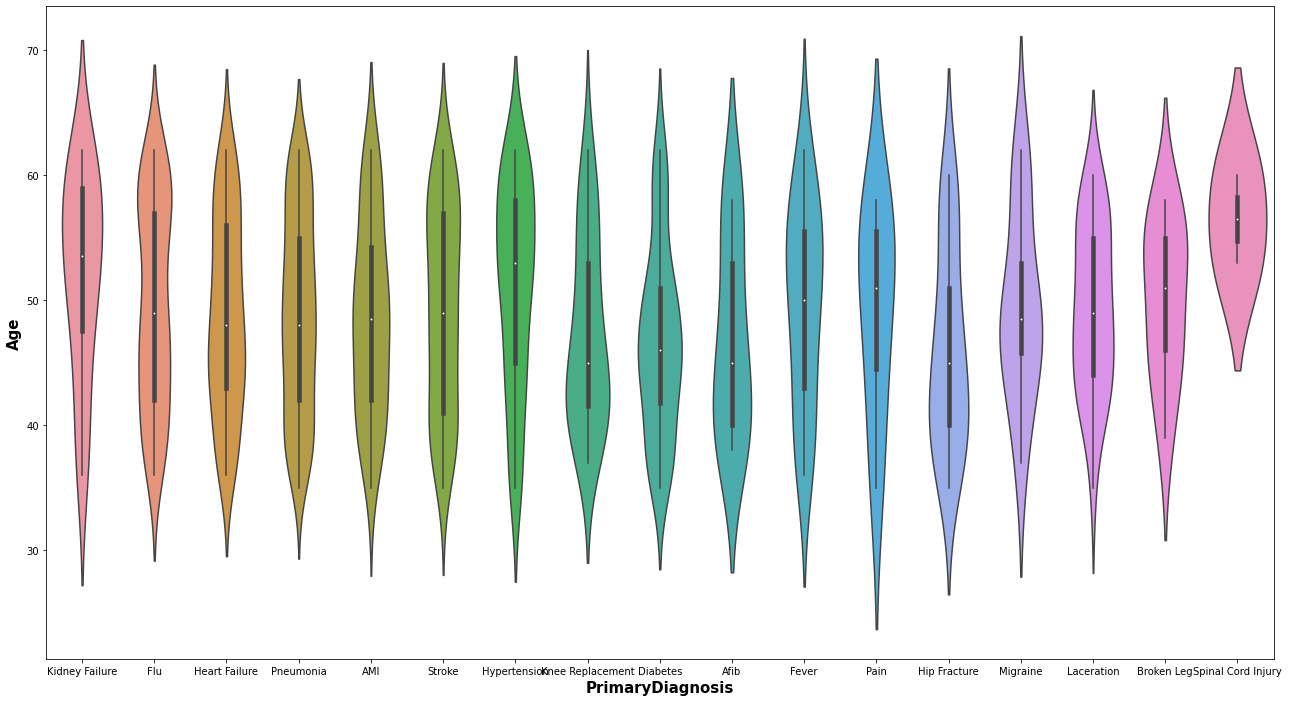

In [6]:
#40. Show a plot showing the distirbution of the patient's age over Primary Diagnosis.

discharge = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
#Retrieving the age fron DOB
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))

patient['Age'] = df_dob.apply(age)

#merging tables Patients and Discharges.
df_merge = patient[["PatientID","Gender","Age"]].merge(discharge[["PatientID","PrimaryDiagnosis"]],
                                                   on = "PatientID",
                                                   how = "inner")

#plotting the violin plot.
fig = plt.figure(figsize = (22,12))
sns.violinplot(data=df_merge,x="PrimaryDiagnosis",y="Age")
# Adding Xticks
plt.xlabel('PrimaryDiagnosis', fontweight ='bold', fontsize = 15)
plt.ylabel('Age', fontweight ='bold', fontsize = 15)
plt.show()

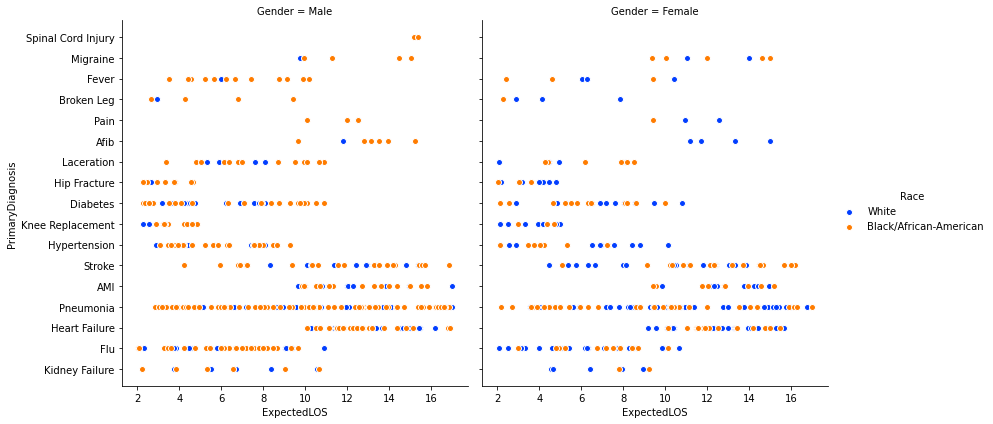

In [7]:
#41. Create a scatter plot showing the ExpectedLOS vs Primary Diagnosis, based on patient's gender.
import seaborn
import matplotlib.pyplot as plt

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")

#merging two tables Patients and ReAdmissionRegistry to retrieve dat from both tables
df_merge = patient[["PatientID","Gender","Race","Language"]].merge(readmregistry[["PatientID","PrimaryDiagnosis","ExpectedLOS"]],
                                                   on = "PatientID",
                                                   how = "inner")
# Form a facetgrid using columns with a hue
graph = seaborn.FacetGrid(df_merge, col ="Gender",hue ="Race",height= 6,palette="bright")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "ExpectedLOS", "PrimaryDiagnosis", edgecolor ="w").add_legend()
# show the object
plt.show()

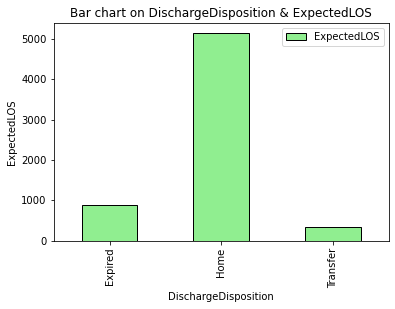

In [8]:
#42. Create a vizualization Expected LOS based on DischargeDisposition
df_RF = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "ReAdmissionRegistry")
df=pd.read_excel("HospitalDataBase .xlsx", sheet_name="Discharges")
pivot = df.pivot_table(index =['DischargeDisposition'], 
                       values =['ExpectedLOS'], aggfunc ='sum')
pivot
pivot.plot(kind='bar',color='lightgreen', width=0.5,edgecolor='black')
plt.xlabel("DischargeDisposition")
plt.ylabel("ExpectedLOS")
plt.title("Bar chart on DischargeDisposition & ExpectedLOS", color= "Black")
plt.show()

In [9]:
#43..Retrive  providerId whose ProviderSpecialty is Cardiology.
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Providers")
df_ed = df[["ProviderID","ProviderSpecialty"]]
Cardio=df_ed.loc[((df_ed["ProviderSpecialty"] == 'Cardiology'))]
Cardio

,ProviderID,ProviderSpecialty
16,17,Cardiology
17,18,Cardiology
18,19,Cardiology
19,20,Cardiology
20,21,Cardiology
21,22,Cardiology
22,23,Cardiology
23,24,Cardiology


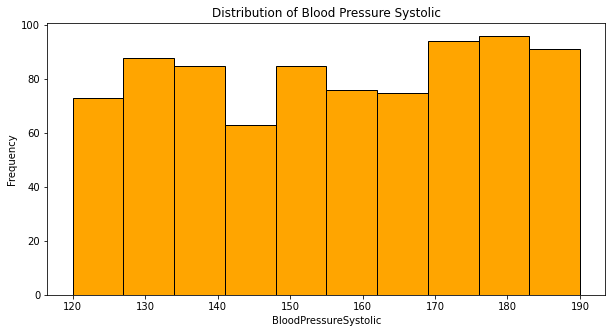

In [10]:
#44.Plot a graph to show the distribution of BloodPressureSystolic in data set.

edvisit = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")

# fix size of the chart

fig = plt.figure(figsize = (10, 5))
x = edvisit["BloodPressureSystolic"]

#code for distribution of expected mortality 
plt.hist(x,color='orange',edgecolor='black')
plt.xlabel('BloodPressureSystolic')
plt.ylabel('Frequency')
plt.title("Distribution of Blood Pressure Systolic", color= "Black")
plt.show()

In [12]:
#45. Calculate count of observed mortality by Service provided.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df = readmregistry[["Service","DischargeDisposition"]]
Mortality = df.groupby("Service")["DischargeDisposition"].apply(lambda x: (x=='Expired').sum()).reset_index(name='Mortality count')
display(Mortality)

,Service,Mortality count
0,Cardiology,15
1,General Medicine,18
2,Hospitalist,10
3,ICU,29
4,Neurology,27
5,Orthopeadics,5
